In [13]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '10' 

In [17]:
# 데이터 불러오기

df = pd.read_excel('../z20_data/stat_142801.xls',skiprows=2,nrows=2,index_col=0)
df

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.30
합계 출산율,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.84


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 출생아 수 to 합계 출산율
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2011    2 non-null      float64
 1   2012    2 non-null      float64
 2   2013    2 non-null      float64
 3   2014    2 non-null      float64
 4   2015    2 non-null      float64
 5   2016    2 non-null      float64
 6   2017    2 non-null      float64
 7   2018    2 non-null      float64
 8   2019    2 non-null      float64
 9   2020    2 non-null      float64
dtypes: float64(10)
memory usage: 176.0+ bytes


In [ ]:
# key word error
df.loc['출생아 수'] 

In [21]:
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [20]:
df.index.values

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [23]:
# 엑셀파일을 import할 때 index 의 보이지 않는 특수문자가 있는지 체크
df.loc['출생아\xa0수']

2011    471.3
2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [24]:
df.rename(index={'출생아\xa0수':'출생아 수','합계\xa0출산율':'합계 출산율'}, inplace=True)

In [25]:
df.loc['출생아 수']

2011    471.3
2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [26]:
df.columns

Index(['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020'],
      dtype='object')

<BarContainer object of 10 artists>

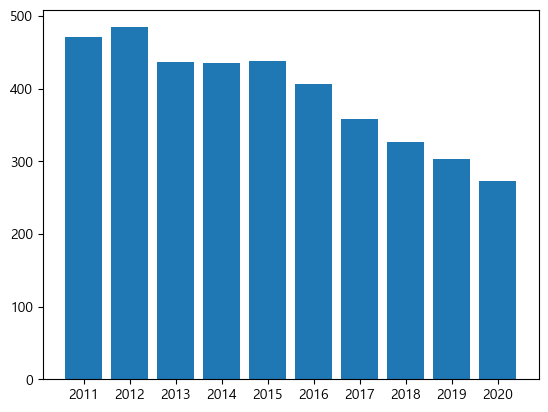

In [27]:
plt.bar(df.columns,df.loc['출생아 수'])

In [28]:
df = df.T

In [29]:
df

,출생아 수,합계 출산율
2011,471.3,1.244
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.840


In [52]:
# 출생아 수는 막대그래프로
# 합계 출산율은 꺾은선 그래프로
x = df.index
y = df['출생아 수'].values

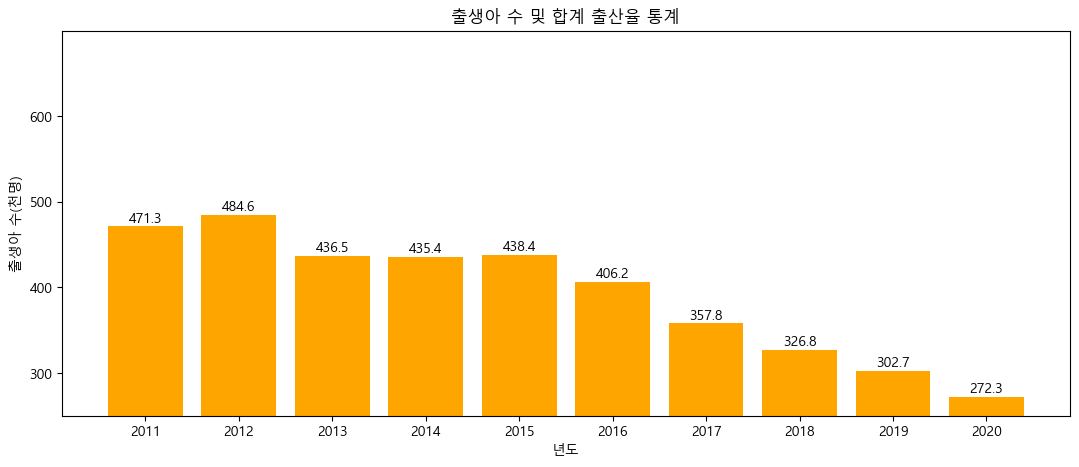

In [81]:
plt.figure(figsize=(13,5))
plt.bar(x,y,label='출생아 수',color = 'orange')

for i,txt in enumerate(y):
    plt.text(x[i],y[i]+5,txt,ha='center')
    
plt.title('출생아 수 및 합계 출산율 통계')
plt.ylim(250,700)
plt.yticks([300,400,500,600])

plt.xlabel('년도')
plt.ylabel('출생아 수(천명)')


plt.show()

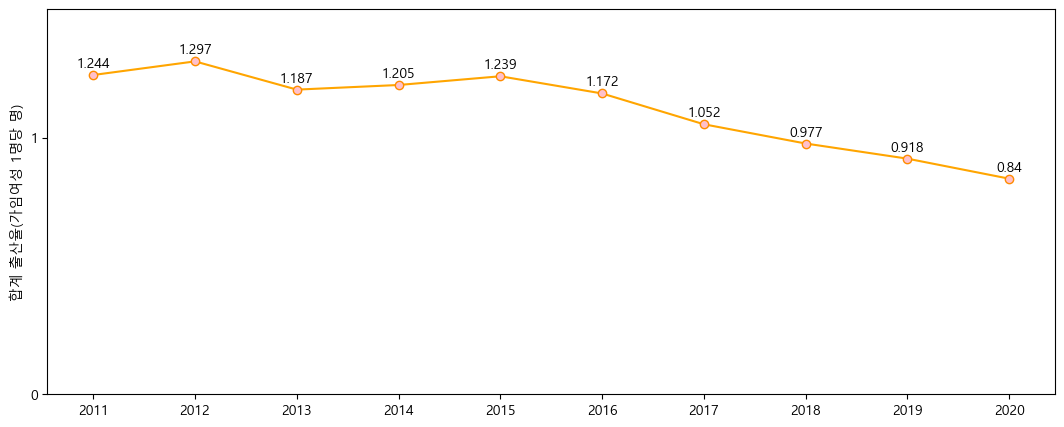

In [80]:
x = df.index
y2 =df['합계 출산율'].values

plt.figure(figsize=(13,5))
plt.plot(x,y2,marker='o',mec='darkorange',mfc='pink', color="orange")

for i, txt in enumerate(y2):
    plt.text(x[i],y2[i]+0.03,txt,ha='center')

plt.ylim(0,1.5)
plt.yticks([0,1])

plt.ylabel('합계 출산율(가임여성 1명당 명)')

plt.show()

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_9528\2202943346.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.text(df.index[i],df['출생아 수'][i]+5,txt,ha='center')
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_9528\2202943346.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.text(df.index[i],df['합계 출산율'][i]+0.05,txt,ha='center')


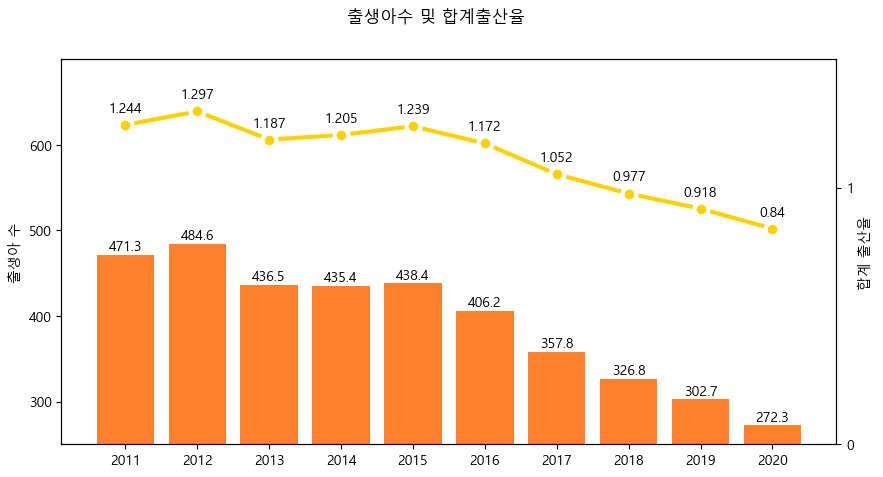

In [113]:
# 그래프 합치기 : sub를 그려서 -> 합친다
fig,ax1 = plt.subplots(figsize=(10,5))
# 상단타이틀 출력
fig.suptitle('출생아수 및 합계출산율')

# 첫번째 막대그래프
ax1.bar(df.index,df['출생아 수'],color='#ff812d')
ax1.set_ylabel("출생아 수")
ax1.set_ylim(250,700)
ax1.set_yticks([300,400,500,600])

for i ,txt in enumerate(df['출생아 수']):
    ax1.text(df.index[i],df['출생아 수'][i]+5,txt,ha='center')

# 두번째 꺾은선 그래프
ax2 = ax1.twinx() # x축을 함계 사용 :  twinsx
ax2.set_ylabel("합계 출산율")
ax2.set_yticks([0,1])
ax2.set_ylim(0,1.5)
ax2.plot(df.index, df['합계 출산율'],color='#ffd100', marker='o',ms=10, markeredgecolor= 'w', markeredgewidth=3, linewidth=3)

for i,txt in enumerate(df['합계 출산율']):
    ax2.text(df.index[i],df['합계 출산율'][i]+0.05,txt,ha='center')
    

# ax1[0].bar(x,y,color='#ff812d')
# ax1[1].plot(x,y2,color='#ffd100')